In [1]:
import pandas as pd
import os
import glob
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="ticks")
sns.set_theme(style="whitegrid")

In [10]:
""" 
Visualize results from embeddings of models with speed features included
"""
path = r'' # use your path
all_files = glob.glob(os.path.join("./results" , "full_evaluation_speed/*.csv"))

dfs = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    dfs.append(df)


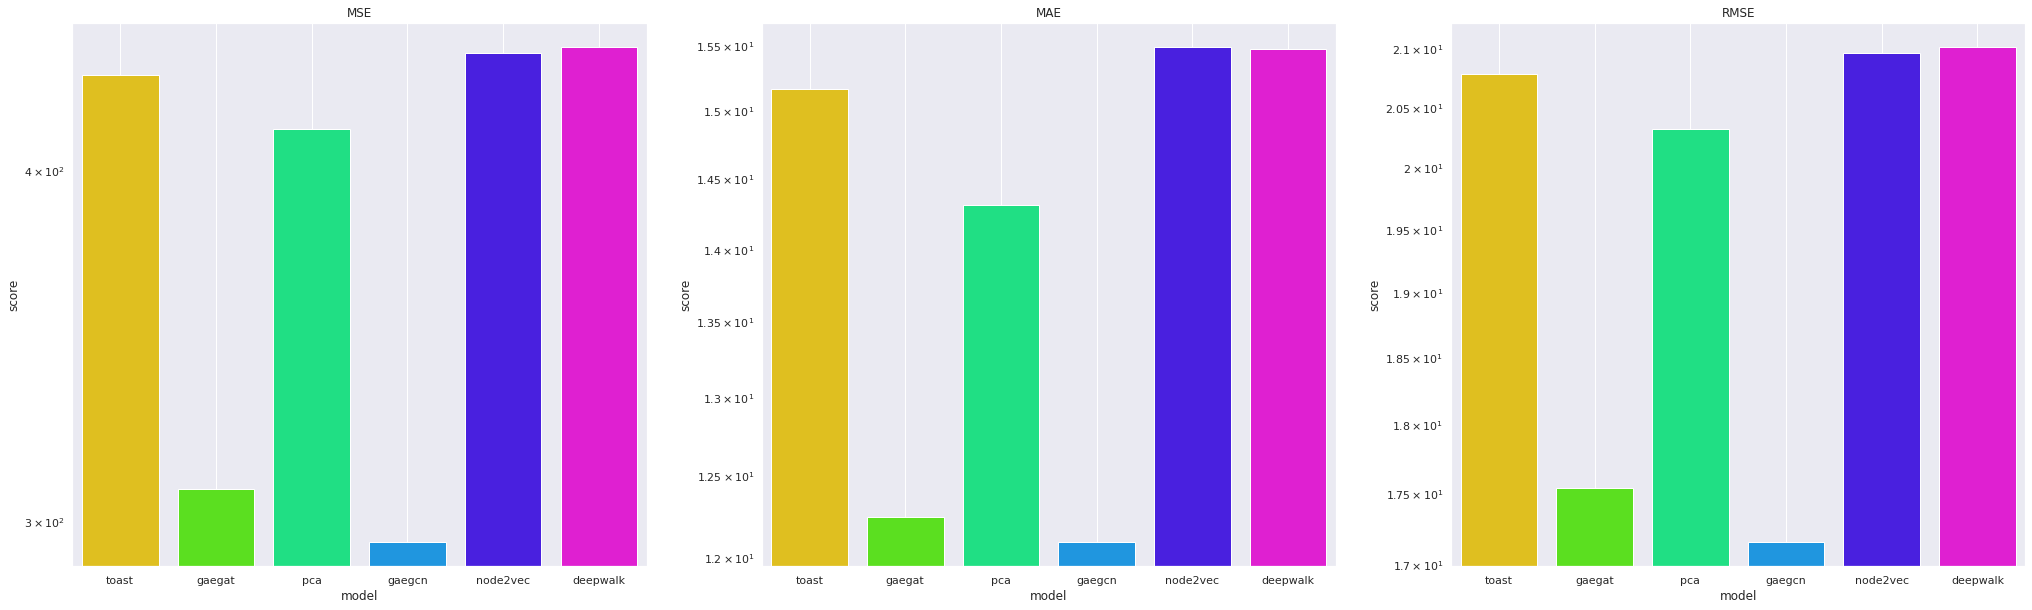

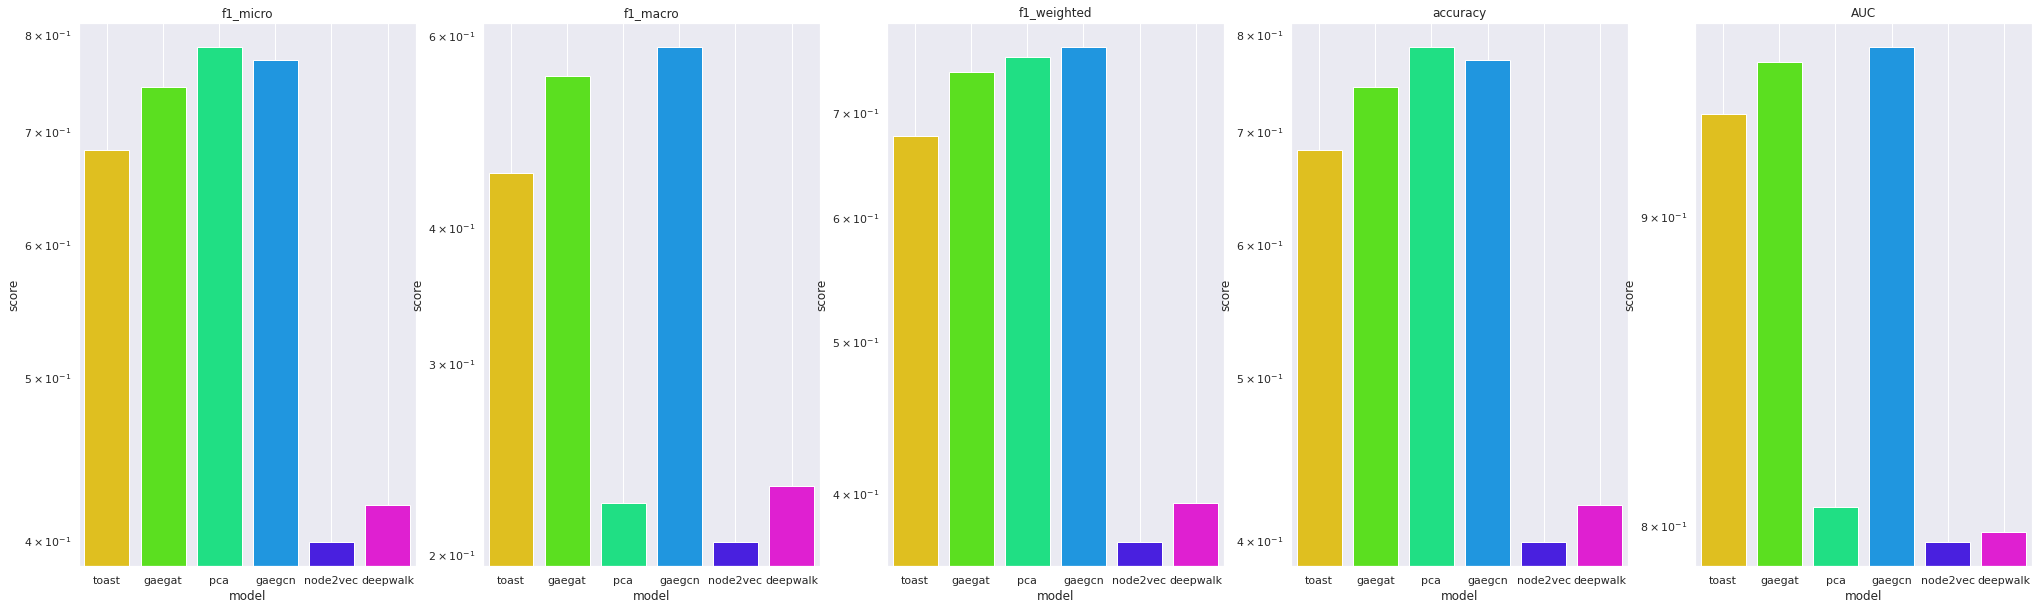

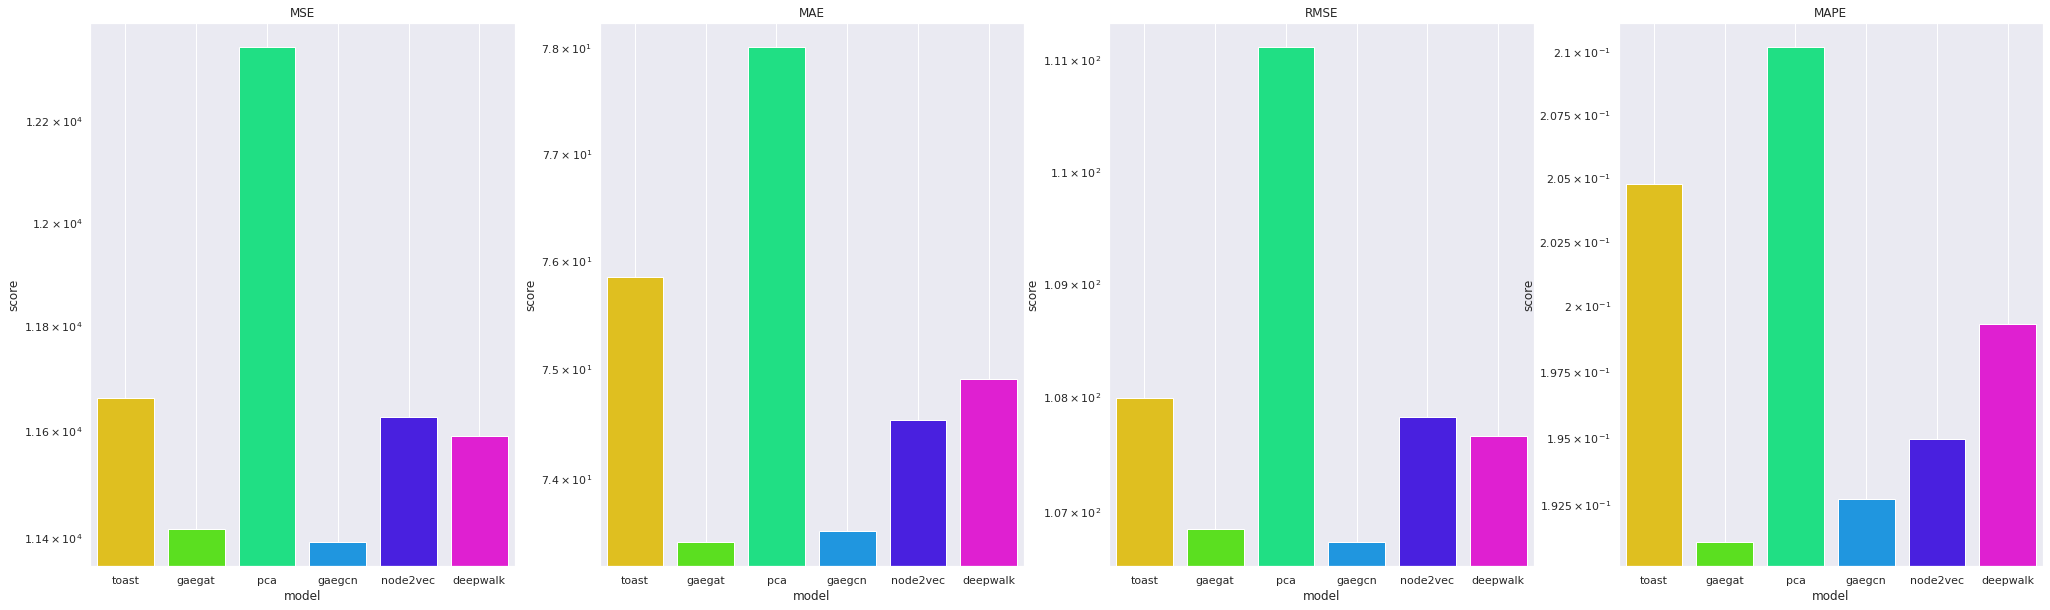

In [63]:
sns.set_style("darkgrid")

for df in dfs:
    # convert to barplot friendly format
    df = df.set_index("model").stack().reset_index().rename(columns={"level_1": "score_func", 0: "score"})
    score_funcs = df["score_func"].unique()
    fig, ax = plt.subplots(1, len(score_funcs), figsize=(35,10))
    for i, sf in enumerate(score_funcs):
        g = sns.barplot(
            data=df[df["score_func"]==sf], 
            x="model", y="score",
            ci="sd", palette="hsv", alpha=1, ax=ax[i]
        )
        g.set_yscale("log")
        g.set_title(sf)
        ax[i].grid()
        #g.despine(left=True)
        #g.set_axis_labels("score function", "score")

In [3]:
"""
Analysis of k-evaluation
"""
all_files = glob.glob(os.path.join("./results" , "gtn_k_eva/*.csv"))

dfs = []
for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    print(filename)
    df["k"] = df['model'].str.split('_').str[2]
    df["type"] = df['model'].str.split('_').str[3]
    dfs.append(df)

./results/gtn_k_eva/roadclf.csv
./results/gtn_k_eva/traveltime_1.csv
./results/gtn_k_eva/traveltime_2.csv
./results/gtn_k_eva/traveltime.csv
./results/gtn_k_eva/meanspeed_1.csv
./results/gtn_k_eva/destination.csv
./results/gtn_k_eva/nextlocation.csv
./results/gtn_k_eva/meanspeed_2.csv
./results/gtn_k_eva/meanspeed.csv


In [6]:
v = dfs[-1].groupby(["type", "k"])["MAE"].agg(["mean", "var"]).reset_index()
v["mean"] = v["mean"].round(3)
print(v.to_latex())

\begin{tabular}{lllrr}
\toprule
{} &           type &  k &    mean &       var \\
\midrule
0  &  bidirectional &  1 &  13.349 &  0.000506 \\
1  &  bidirectional &  2 &  13.343 &  0.000725 \\
2  &  bidirectional &  3 &  13.354 &  0.001299 \\
3  &  bidirectional &  4 &  13.413 &  0.001068 \\
4  &  bidirectional &  5 &  13.380 &  0.001468 \\
5  &  bidirectional &  6 &  13.367 &  0.000987 \\
6  &        forward &  1 &  13.350 &  0.000307 \\
7  &        forward &  2 &  13.337 &  0.000930 \\
8  &        forward &  3 &  13.345 &  0.000554 \\
9  &        forward &  4 &  13.416 &  0.000852 \\
10 &        forward &  5 &  13.384 &  0.001433 \\
11 &        forward &  6 &  13.371 &  0.000999 \\
\bottomrule
\end{tabular}



/tmp/ipykernel_31064/1266183457.py:3: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(v.to_latex())


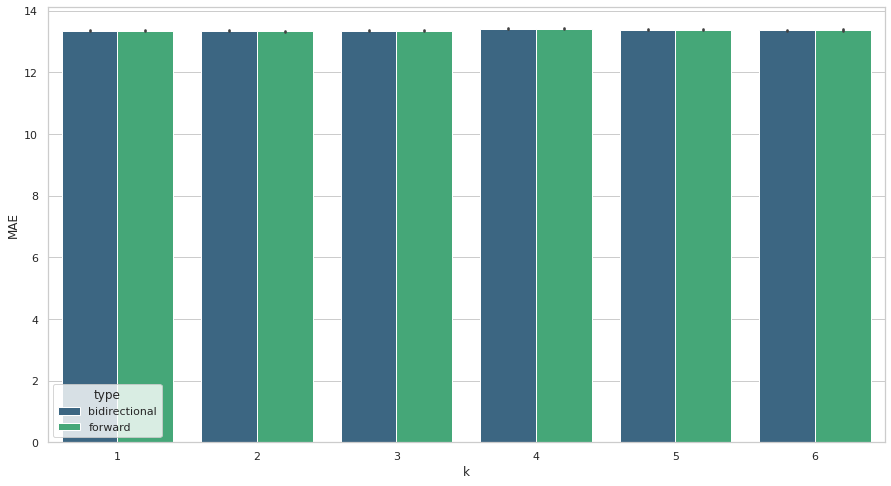

In [4]:
plt.figure(figsize=(15,8))

ax = sns.barplot(x="k", y="MAE", hue="type", data=dfs[-1], palette="viridis")
#ax = sns.swarmplot(x="k", y="f1_macro", hue="type", data=dfs[1], palette="viridis")

In [2]:
# Ablation plots
all_files = glob.glob(os.path.join("./results" , "gtn_ablation/*.csv"))

dfs = []
for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    print(filename)
    dfs.append(df)

./results/gtn_ablation/meanspeed.csv
./results/gtn_ablation/roadclf.csv
./results/gtn_ablation/destination.csv
./results/gtn_ablation/nextlocation.csv


[(10.0, 15.0)]

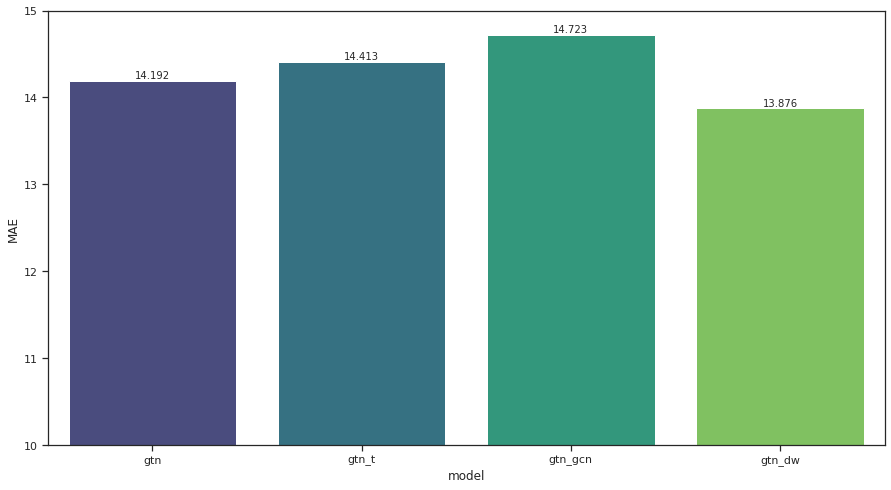

In [19]:
plt.figure(figsize=(15,8))
dfs[0]["MAE"] = dfs[0]["MAE"].round(3)
ax = sns.barplot(x="model", y="MAE", data=dfs[0], palette="viridis")
ax.bar_label(ax.containers[0])
ax.set(ylim=(10, 15))

In [11]:
""" 
Ablation Study GTC & Traj2vec
"""
# Ablation plots
all_files = glob.glob(os.path.join("./results" , "gtc_traj2vec_ablation/*.csv"))

dfs = []
for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    print(filename)
    dfs.append(df)

./results/gtc_traj2vec_ablation/roadclf.csv
./results/gtc_traj2vec_ablation/meanspeed.csv


                 model  f1_micro  f1_macro  f1_weighted  accuracy  ROC-AUC  \
6     con-traj2vec-gtc     0.620     0.459        0.606     0.620    0.903   
4                  gtc     0.641     0.339        0.597     0.641    0.859   
7  con-deepwalk-gaegcn     0.539     0.333        0.526     0.539    0.863   
5             traj2vec     0.479     0.319        0.457     0.479    0.837   
0               gaegcn     0.613     0.258        0.569     0.613    0.811   

   seed           type  
6    88  concatination  
4    88           conv  
7    88  concatination  
5    88           walk  
0    88           conv  


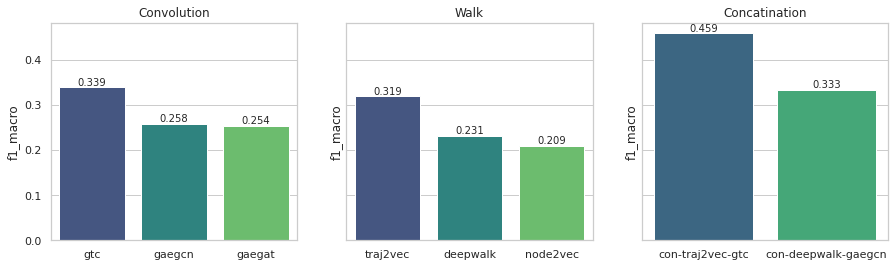

In [24]:
dfs[0] = dfs[0].round(3)
print(dfs[0].head())
dfs[0].sort_values("f1_macro", inplace=True, ascending=False)
fig, ax =plt.subplots(1, 3, sharey=True, figsize=(15,4))
sns.barplot(x="model", y="f1_macro", data=dfs[0][dfs[0]["type"]=="conv"], palette="viridis", ax=ax[0])
sns.barplot(x="model", y="f1_macro", data=dfs[0][dfs[0]["type"]=="walk"], palette="viridis", ax=ax[1])
sns.barplot(x="model", y="f1_macro", data=dfs[0][dfs[0]["type"]=="concatination"], palette="viridis", ax=ax[2])
types = ["Convolution", "Walk", "Concatination"]
for i, a in enumerate(ax):
    a.set_title(f"{types[i]}")
    a.bar_label(a.containers[0])
    a.set_xlabel("")
# ax.set(ylim=(10, 15))
